In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
pi= numpy.pi
from scipy.stats import chi2
from scipy.stats import norm
import timeit

# Challenge 2.1 Built-in random generators

The built-in functions where found in the documentation "https://docs.scipy.org/doc/numpy/reference/routines.random.html"
We call the exponential and normal distributions with:
numpy.random.exponential(mean,size)
numpy.random.normal(mean, standard deviation, size)

In [46]:
N= 10**6
x = numpy.random.random_sample(N)
alpha= 0.25
mean = 0.
std_dev = 1.

In [17]:
#---exponential distribution with built-in generator---#
for i in range(3,7):
    Ni= 10**i
    %timeit numpy_exp = numpy.random.exponential(1/alpha,Ni)

The slowest run took 8.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.8 µs per loop
1000 loops, best of 3: 236 µs per loop
100 loops, best of 3: 2.35 ms per loop
10 loops, best of 3: 25.9 ms per loop


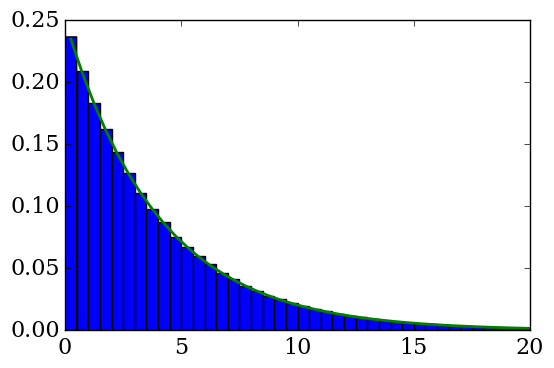

In [18]:
numpy_exp = numpy.random.exponential(1/alpha,N)
# Plot
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(numpy_exp,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

In [19]:
#---Exponential distribution from uniform distribution---#
for i in range(3,7):
    Ni = 10**i
    %timeit x = numpy.random.random_sample(Ni);y = -1/alpha*numpy.log(1-x)

The slowest run took 8.98 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 27.1 µs per loop
1000 loops, best of 3: 211 µs per loop
100 loops, best of 3: 2.05 ms per loop
10 loops, best of 3: 34.5 ms per loop


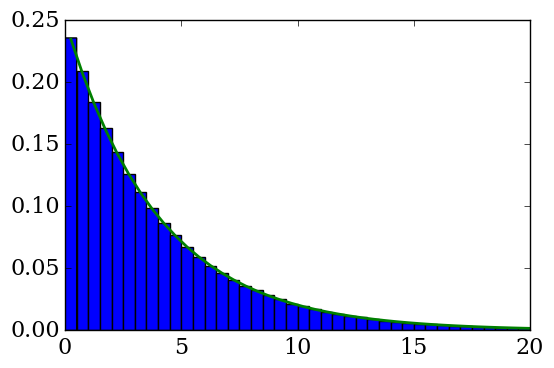

In [20]:
x = numpy.random.random_sample(N);y = -1/alpha*numpy.log(1-x)
# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

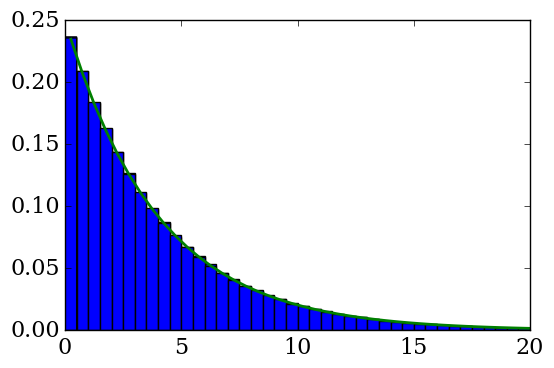

In [21]:
#---Comparison of the two generators---#
pyplot.xlim(0,20)
pyplot.hist(numpy_exp,bins,normed=True,color = 'blue'); #built-in generator
pyplot.hist(y,bins,normed=True);                        #Exponential distribution from uniform distribution
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Those two methods give the same result. The time necessary for their execution is also similar, linear in N.

In [22]:
#---Normal distribution using a built-in function---#
for i in range(3,8):
    Ni= 10**i
    %timeit numpy_normal = numpy.random.normal(mean,std_dev,Ni)

The slowest run took 4.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 42.6 µs per loop
1000 loops, best of 3: 434 µs per loop
100 loops, best of 3: 3.92 ms per loop
10 loops, best of 3: 43.8 ms per loop
1 loop, best of 3: 409 ms per loop


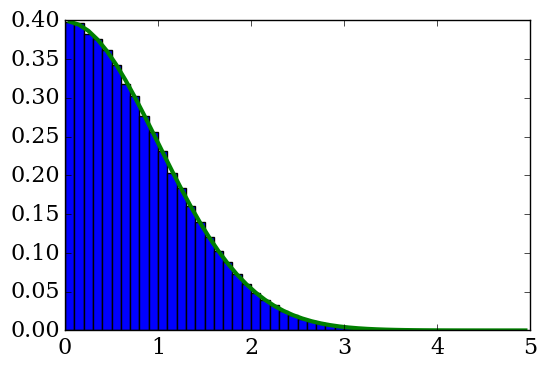

In [49]:
numpy_normal = numpy.random.normal(mean,std_dev,N)
# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(-5.,5., binwidth)
pyplot.hist(numpy_normal,bins,normed=True);
pyplot.plot(xc,numpy.exp(-(xc-mean)**2/2.0/std_dev**2)/numpy.sqrt(2*numpy.pi)/std_dev,lw=3,color='green')

In [42]:
def normal_alternate (mean,std_dev,N):
    # Distribute g according to the exponential distribution
    uniform1 = numpy.random.random_sample(N)
    g = numpy.log(1/(1-uniform1))

    # Probabilty of drawing g according to the exponential distribution
    p_g_exp = numpy.exp(-g)

    # Probability of drawing g according to the (positive) normal distribution
    p_g_gauss = 2.0*numpy.exp(-(g-mean)**2/2.0/std_dev**2)/numpy.sqrt(2*numpy.pi)/std_dev

    # Draw a second uniform distribution for the acceptance
    uniform2 = numpy.random.random_sample(N)

    # Create acceptance mask
    condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

    # Extract the accepted random numbers
    h = numpy.extract(condition,g)

    # Print the acceptance ratio
    #print("Acceptance ratio:",h.size/g.size)
    return h

In [50]:
for i in range(3,8):
    Ni= 10**i
    %timeit h = normal_alternate(mean,std_dev,Ni)

The slowest run took 4.72 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 104 µs per loop
1000 loops, best of 3: 722 µs per loop
100 loops, best of 3: 7.85 ms per loop
10 loops, best of 3: 125 ms per loop
1 loop, best of 3: 1.34 s per loop


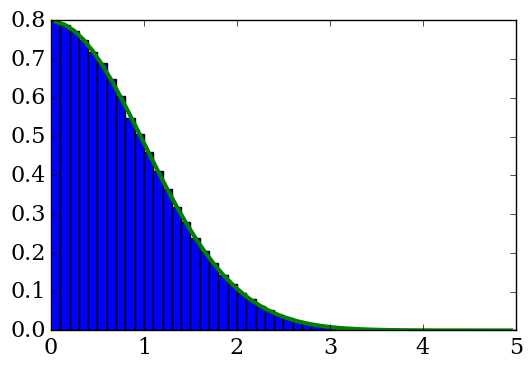

In [51]:
h = normal_alternate(mean,std_dev,N)
# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-(xc-mean)**2/2.0/std_dev**2)/numpy.sqrt(2*numpy.pi)/std_dev,lw=3,color='green')

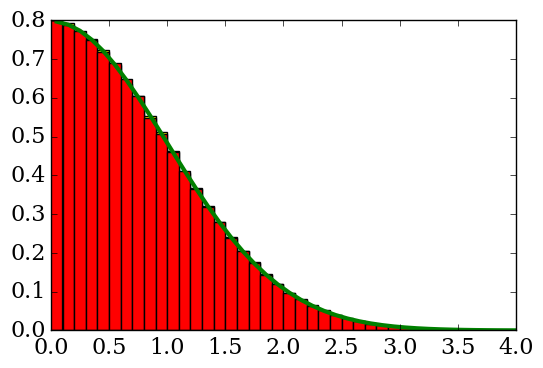

In [52]:
#---Comparison of the two methods---#
pyplot.xlim(0,4)
binwidth=0.1
pyplot.hist(numpy_normal,bins,normed=True,color = 'yellow');
pyplot.hist(h,bins,normed='true',color='red');
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

The two methods give good results. Still, the second one has some cons that the built-in normal generator doesn't have.

1: We do obtain 0.71 * N values / the built-in generator returns N values.

2: The algorithm is slower and the time it takes to execute it increases faster than N**1 / Execution time for the built-in generator is linear in time.

# Challenge 2.2 Box Muller

In [53]:
#Define the width of the bins in wich we will fill with "N_simulation" generated random variables.
binwidth = 0.25
N_simulation = 10**4

In [54]:
#Uniformly distributed variables
u1 = numpy.random.random_sample(N_simulation)
u2 = numpy.random.random_sample(N_simulation)
#Gaussian distributed variables - Box-Muller Method - (source:Wikipedia) 
z1 = (-2*numpy.log(u1))**0.5 * numpy.cos(2*pi*u2)
z2 = (-2*numpy.log(u1))**0.5 * numpy.sin(2*pi*u2)

In [55]:
#Define a function that takes a real number "x" as parameter and returns the normal distribution (mean=0, variance=1)
#evaluated at "x". 
#We will use this function several times.
def normalgauss(x):
    N_gauss = (2*pi)**-0.5 * numpy.exp(-0.5*x**2)
    return N_gauss

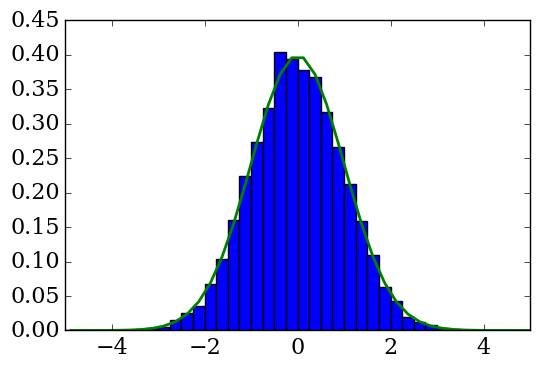

In [56]:
#Comparison z1 - Gaussian function
#Fill bins of width "binwidth" with generated variable z1 and compare it with normal distribution
pyplot.xlim(-5.,5.)
bins = numpy.arange(-5.,6.,binwidth)
pyplot.hist(z1,bins,normed=True)
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,normalgauss(xc), lw=2)

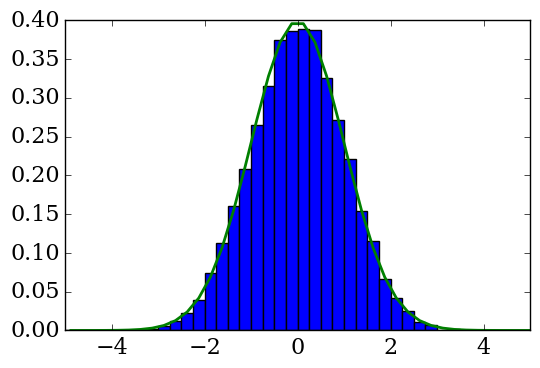

In [57]:
#Comparison z2 - Normal gaussian function
#Fill bins of width "binwidth" with generated variable z2 and compare it with normal distribution
pyplot.xlim(-5.,5.)
bins = numpy.arange(-5.,6.,binwidth)
pyplot.hist(z2,bins,normed=True)
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,normalgauss(xc), lw=2)

## Q2 tests - z1,z2 follow normal distribution

We will perfom a chi2 test on z1 and z2 to tell if they follow a normal distribution.
The method was explained to us during a course last year. It is accessible here "http://uv.ulb.ac.be/pluginfile.php/582363/mod_resource/content/0/statmath.pdf" page 74. 

In [58]:
#Define an expected histogram "prob_hist" and experimental histograms "exp_hist1" and "exp_hist2" using z1 and z2.
nbins = int(10/binwidth)
prob_hist = numpy.zeros(nbins)
for i in range (nbins):
    prob_hist[i] = (norm.cdf(-5.+(i+1)*binwidth) - norm.cdf(-5.+(i)*binwidth))*N_simulation
exp_hist1=numpy.histogram(z1,nbins,(-5,5))
exp_hist2=numpy.histogram(z2,nbins,(-5,5))

In [59]:
#Perform the chi2 test at alpha level 0.05,show the test values and the value above wich we will discard the normality hipothesis. 
def khi2 (exphisto,prevhisto):
    khi = 0.
    for i in range (nbins):
        khi=khi + (exphisto[i]-prevhisto[i])**2/prevhisto[i]
    return khi
print(khi2(exp_hist1[0],prob_hist))
print(khi2(exp_hist2[0],prob_hist))
print(chi2.ppf(0.95,nbins-1))

39.636426827
23.5647512375
54.5722277589


REMARK: sometimes the test value is too high and the random variable doesn't pass the test for normality. According to the theory, this should happen for 5% of the tests. Let's run a large number of tests and see how many of them are successful.
(For ntry high and N_simulation high, this may take some time).
REMARK 2: this test depends on binwidth. Let's give a better interpretation of this test. We are just testing if the way the bins are filled with generated values is similar to bins filled with a true gaussian variable. If we used only one, very very large bin, the test would be successful no matter what distribution follow our generated values.

In [60]:
passcount=0
ntry=100
for i in range(ntry):
    numpy.random.seed()
        #Uniformly distributed variables
    u1 = numpy.random.random_sample(N_simulation)
    u2 = numpy.random.random_sample(N_simulation)
    #Gaussian distributed variables - Box-Muller Method - (source:Wikipedia) 
    z1 = (-2*numpy.log(u1))**0.5 * numpy.cos(2*pi*u2)
    z2 = (-2*numpy.log(u1))**0.5 * numpy.sin(2*pi*u2)
    exp_hist1=numpy.histogram(z1,nbins,(-5,5))
    exp_hist2=numpy.histogram(z2,nbins,(-5,5))
    q1=khi2(exp_hist1[0],prob_hist)
    q2=khi2(exp_hist2[0],prob_hist)
    test1= chi2.ppf(0.95,nbins-1) - q1
    test2= chi2.ppf(0.95,nbins-1) - q2
    if (test1 > 0):
        passcount = passcount +1
    if (test2 > 0):
        passcount = passcount +1
        
print(passcount/2/ntry*100)

91.5


This result satisfies us.
Given that this test is an asymptotic one (for N_simulation going to infinity), increasing this value will bring successful test rate closer to 0.95.

## Test for independence between variables z1 and z2.

To run the test for independence, we will use the method explained to us last october, avaible in this document.
http://tverdebo.ulb.ac.be/Chap3_mult.pdf, page 54

The goal of the test is to see if the covariance between z1 and z2 is null, thus proving independence.

In [61]:
#Uniformly distributed variables
u1 = numpy.random.random_sample(N_simulation)
u2 = numpy.random.random_sample(N_simulation)
#Gaussian distributed variables - Box-Muller Method - (source:Wikipedia) 
z1 = (-2*numpy.log(u1))**0.5 * numpy.cos(2*pi*u2)
z2 = (-2*numpy.log(u1))**0.5 * numpy.sin(2*pi*u2)

In [62]:
#Construct empirical variances for z1,z2 and empirical covariance for z1,z2
z1_mean= numpy.average(z1)
z2_mean= numpy.average(z2)
W1=0
W2=0
W12 = 0
for i in range(len(z1)):
    W1 = W1 + (z1[i]-z1_mean)**2
    W2 = W2 + (z2[i]-z2_mean)**2
    W12 = W12 + (z1[i]-z1_mean)*(z2[i]-z2_mean)
S11 = 1/(len(z1)-1)*W1
S22 = 1/(len(z1)-1)*W2
S12 = 1/(len(z1)-1)*W12

#Evaluate the test statistic, print it and compare it to the value above with the test is unsuccesful.
test_statistic = -len(z1)*numpy.log(1-S12**2/S11/S22)
print(test_statistic)
print(chi2.ppf(0.95,1))

1.15647183295
3.84145882069


Again, about 5% of tests should be unsuccesful. We run many tests to see that.

In [66]:
passcount=0
ntry=100
for i in range(ntry):
    numpy.random.seed()
        #Uniformly distributed variables
    u1 = numpy.random.random_sample(N_simulation)
    u2 = numpy.random.random_sample(N_simulation)
    #Gaussian distributed variables - Box-Muller Method - (source:Wikipedia) 
    z1 = (-2*numpy.log(u1))**0.5 * numpy.cos(2*pi*u2)
    z2 = (-2*numpy.log(u1))**0.5 * numpy.sin(2*pi*u2)
    #La stastistique de test
    z1_mean= numpy.average(z1)
    z2_mean= numpy.average(z2)
    W1=0
    W2=0
    W12 = 0
    for i in range(len(z1)):
        W1 = W1 + (z1[i]-z1_mean)**2
        W2 = W2 + (z2[i]-z2_mean)**2
        W12 = W12 + (z1[i]-z1_mean)*(z2[i]-z2_mean)
    S11 = 1/(len(z1)-1)*W1
    S22 = 1/(len(z1)-1)*W2
    S12 = 1/(len(z1)-1)*W12
    test_statistic = -len(z1)*numpy.log(1-S12**2/S11/S22)
    test= chi2.ppf(0.95,1) - test_statistic
    if (test > 0):
        passcount = passcount +1
        
print(passcount/ntry*100)

95.0


Everything works as expected. Hail Mathematics.